<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Eigenvalues and eigenvectors

---

If we multiply a quadratic $n\times n$-matrix with an $n$-component vector, we get another $n$-component vector. We can find particular numerical values $\lambda$ and particular vectors $v$ for which the following operations are the same:

$$
A v = \lambda v
$$

This equation is called an **eigenvalue equation**, $\lambda$ is the **eigenvalue** and $v$ is the **eigenvector** of $A$.

It says that multiplying $v$ by the matrix $A$ gives the same result as multiplying $v$ by the number $\lambda$, i.e. the vector $A v$ points in the same direction as $v$. 

There can be up to $n$ different such eigenvalues $\lambda$ and associated eigenvectors. 

The eigenvalues can be determined with the help of numpy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set(font_scale=1.5)
np.set_printoptions(precision=4)

#### Example matrices

In [2]:
A = np.array([[1, 2], [3, 1]])
A_1 = np.array([[0, -1], [1, 0]])

#### Obtain the eigenvalues and eigenvectors:

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 3.4495 -1.4495]
Eigenvectors:
[[ 0.6325 -0.6325]
 [ 0.7746  0.7746]]


In [4]:
A.dot(eigenvectors[:, 0])

array([2.1816, 2.672 ])

In [5]:
eigenvalues[0]*eigenvectors[:, 0]

array([2.1816, 2.672 ])

#### Illustrating eigenvectors

Forming the dot-product of an $n\times n$-matrix with any $n$-dimensional vector will result in a new $n$-dimensional vector.

- The original eigenvector and the result from the dot-product will point in the same direction (but may have different lengths).
- The dot-product with any other vector will give a vector pointing in a different direction which may have different length.

In [6]:
some_vector = np.array([1, 0])
eigen_vector = eigenvectors[:, 0]
A_some = A.dot(some_vector)
A_eigen = A.dot(eigen_vector)

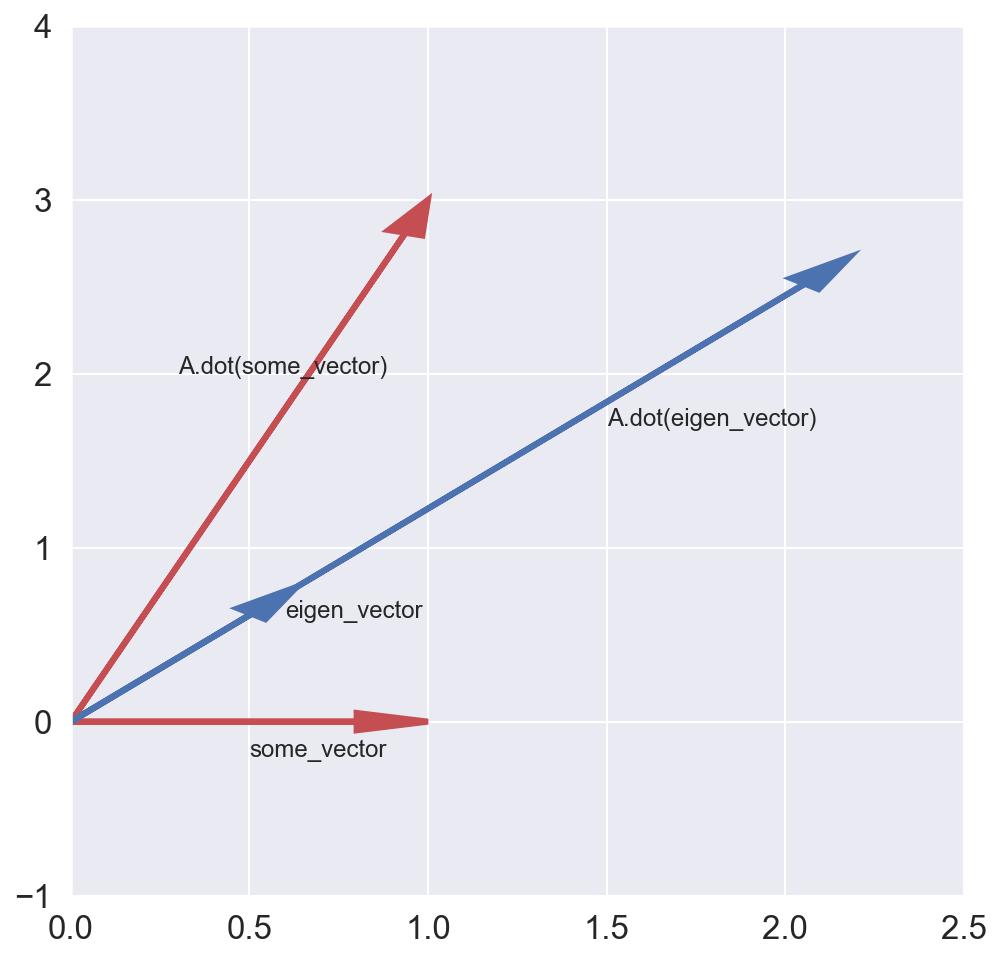

In [7]:
# setting width and length of arrow top
hw = 0.1
hl = 0.2

fig, ax = plt.subplots(figsize=(8, 8))

ax.arrow(0, 0, some_vector[0], some_vector[1], fc='r', ec='r', head_width=hw, head_length=hl,
         length_includes_head=True, label='x', lw=3)
ax.arrow(0, 0, eigen_vector[0], eigen_vector[1], fc='b', ec='b', head_width=hw, head_length=hl,
         length_includes_head=True, label='y', lw=3)
ax.arrow(0, 0, A_some[0], A_some[1], fc='r', ec='r', head_width=hw, head_length=hl,
         length_includes_head=True, label='x', lw=3)
ax.arrow(0, 0, A_eigen[0], A_eigen[1], fc='b', ec='b', head_width=hw, head_length=hl,
         length_includes_head=True, label='y', lw=3)

ax.annotate("A.dot(some_vector)", xy=(2, 2), xytext=(0.3, 2), fontsize=12)
ax.annotate("some_vector", xy=(2, 3), xytext=(0.5, -0.2), fontsize=12)
ax.annotate("eigen_vector", xy=(1, 4), xytext=(0.6, 0.6), fontsize=12)
ax.annotate("A.dot(eigen_vector)", xy=(2, -1), xytext=(1.5, 1.7), fontsize=12)

ax.set_xlim([0, 2.5])
ax.set_ylim([-1, 4])

plt.show()

#### Check that the eigenvalue equation is fulfilled

In [8]:
i = 0
print('A*v_{}'.format(i))
print(A.dot(eigenvectors[:, i]))
print('lambda_{}*v_{}'.format(i, i))
print(eigenvalues[i]*(eigenvectors[:, i]))

A*v_0
[2.1816 2.672 ]
lambda_0*v_0
[2.1816 2.672 ]


#### Let's put that into a function

In [9]:
def eigen_checker(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)

    print("Eigenvalues:")
    print(eigenvalues)
    print("Eigenvectors:")
    print(eigenvectors)

    for i in range(len(A)):
        print("Verify eigenvalue equation {}:".format(i))
        print(np.allclose(A.dot(eigenvectors[:, i]),
                          eigenvalues[i]*(eigenvectors[:, i])))

    return eigenvalues, eigenvectors

In [10]:
eigenvalues, eigenvectors = eigen_checker(A)

Eigenvalues:
[ 3.4495 -1.4495]
Eigenvectors:
[[ 0.6325 -0.6325]
 [ 0.7746  0.7746]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


In [11]:
eigen_checker(A_1)

Eigenvalues:
[0.+1.j 0.-1.j]
Eigenvectors:
[[0.7071+0.j     0.7071-0.j    ]
 [0.    -0.7071j 0.    +0.7071j]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([0.+1.j, 0.-1.j]), array([[0.7071+0.j    , 0.7071-0.j    ],
        [0.    -0.7071j, 0.    +0.7071j]]))

#### Check the behaviour for a vector which is not an eigenvector:

In [12]:
vector_1 = np.array([1, -1])
print(A.dot(vector_1))

[-1  2]


In [13]:
eigen_checker(np.array([[3, 0], [0, 1]]))

Eigenvalues:
[3. 1.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([3., 1.]), array([[1., 0.],
        [0., 1.]]))

### Answer the following questions

- Construct a diagonal matrix (non-zero values for entries A[i,i], all other entries zero). What are its eigenvalues?

- Find two matrices which have the same eigenvalues, but different eigenvectors.

- Find two matrices which have different eigenvalues, but the same eigenvectors.

In [14]:
ex_1 = np.array([[2, 0], [0, 3]])
ex_2 = np.array([[2, 1], [0, 3]])
ex_3 = np.array([[1, 0], [0, 1]])
ex_4 = np.array([[2, 0], [0, 2]])

In [15]:
eigen_checker(ex_1)

Eigenvalues:
[2. 3.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([2., 3.]), array([[1., 0.],
        [0., 1.]]))

In [16]:
eigen_checker(ex_2)

Eigenvalues:
[2. 3.]
Eigenvectors:
[[1.     0.7071]
 [0.     0.7071]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([2., 3.]), array([[1.    , 0.7071],
        [0.    , 0.7071]]))

In [17]:
eigen_checker(ex_3)

Eigenvalues:
[1. 1.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([1., 1.]), array([[1., 0.],
        [0., 1.]]))

In [18]:
eigen_checker(ex_4)

Eigenvalues:
[2. 2.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]
Verify eigenvalue equation 0:
True
Verify eigenvalue equation 1:
True


(array([2., 2.]), array([[1., 0.],
        [0., 1.]]))